In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("covid_time_series.csv")

In [3]:
len(df.columns)

65

In [4]:
df = df.drop(columns = ['Province/State','Lat','Long'])

In [5]:
mod_df = df.drop(columns = ['Country/Region'])
for column in mod_df:
    count = df[column].astype(bool).sum(axis=0)
    if(count < 147):
        df = df.drop(columns = [column])
df.sort_values('3/4/20',ascending=False)

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
154,China,67332,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790,67794,67798,67799,67800,67800,67800,67800,67800
156,"Korea, South",5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236,8320,8413,8565,8652,8799,8897
16,Italy,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138
155,Iran,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638
158,China,1350,1351,1352,1352,1352,1352,1353,1356,1356,1356,1356,1360,1361,1364,1370,1378,1395,1400,1407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
238,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# # Country-wise Data

In [6]:
df1 = df.groupby('Country/Region').sum().reset_index().sort_values('3/22/20',ascending=False)
df1

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
33,China,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81397
81,Italy,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138
160,US,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489,33272
145,Spain,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768
63,Germany,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Somalia,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
45,Djibouti,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
31,Chad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
151,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


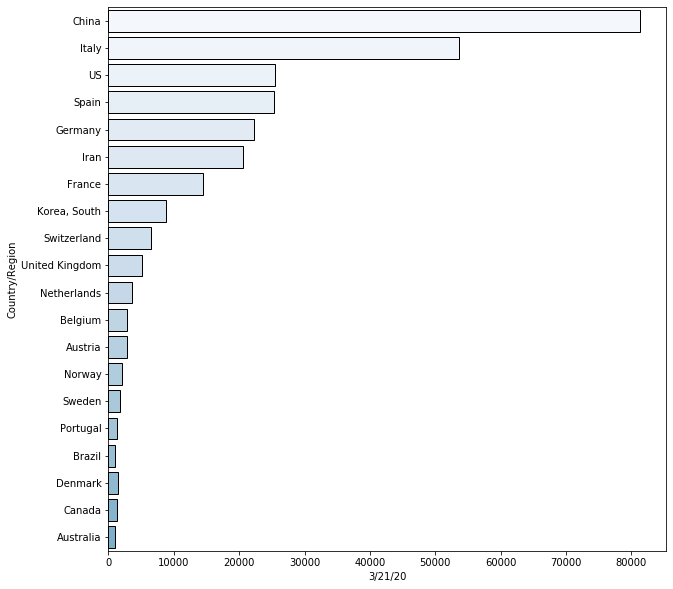

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x=df1['3/21/20'],y=df1['Country/Region'][:20],edgecolor='black',palette=sns.color_palette('Blues',40))

# Date-wise

In [19]:
df2 = df1.T

In [9]:
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:]
df2 = df2.reset_index()
df2

Country/Region,index,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,...,Eritrea,Mozambique,Cape Verde,Dominica,Timor-Leste,Somalia,Djibouti,Chad,Syria,Papua New Guinea
0,3/4/20,80386,3089,149,222,262,2922,288,5621,90,...,0,0,0,0,0,0,0,0,0,0
1,3/5/20,80537,3858,217,259,482,3513,380,6088,114,...,0,0,0,0,0,0,0,0,0,0
2,3/6/20,80690,4636,262,400,670,4747,656,6593,214,...,0,0,0,0,0,0,0,0,0,0
3,3/7/20,80770,5883,402,500,799,5823,957,7041,268,...,0,0,0,0,0,0,0,0,0,0
4,3/8/20,80823,7375,518,673,1040,6566,1134,7314,337,...,0,0,0,0,0,0,0,0,0,0
5,3/9/20,80860,9172,583,1073,1176,7161,1217,7478,374,...,0,0,0,0,0,0,0,0,0,0
6,3/10/20,80887,10149,959,1695,1457,8042,1792,7513,491,...,0,0,0,0,0,0,0,0,0,0
7,3/11/20,80921,12462,1281,2277,1908,9000,2290,7755,652,...,0,0,0,0,0,0,0,0,0,0
8,3/12/20,80932,12462,1663,2277,2078,10075,2290,7869,652,...,0,0,0,0,0,0,0,0,0,0
9,3/13/20,80945,17660,2179,5232,3675,11364,3678,7979,1139,...,0,0,0,0,0,0,0,0,0,0


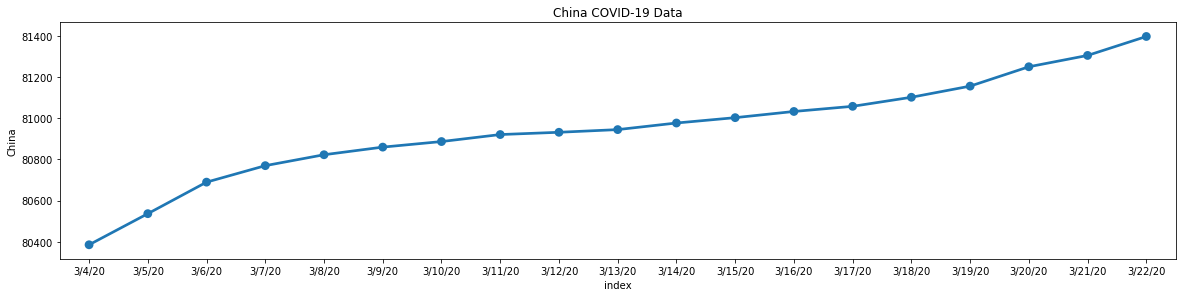

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.title('China COVID-19 Data')
sns.pointplot(x=df2['index'],y=df2['China'])

In [11]:
continents = pd.read_csv('continents.csv')
conts = continents['Continent'].unique()
df3 = pd.merge(right=df,left=continents,right_on='Country/Region',left_on='Country')
df3

,Continent,Country,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Africa,Algeria,Algeria,12,12,17,17,19,20,20,...,26,37,48,54,60,74,87,90,139,201
1,Africa,Angola,Angola,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
2,Africa,Benin,Benin,0,0,0,0,0,0,0,...,0,0,0,1,1,2,2,2,2,2
3,Africa,Cameroon,Cameroon,0,0,1,1,2,2,2,...,2,2,2,4,10,10,13,20,27,40
4,Africa,Cape Verde,Cape Verde,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,South America,Paraguay,Paraguay,0,0,0,0,1,1,1,...,6,6,6,8,9,11,11,13,18,22
466,South America,Peru,Peru,0,0,1,1,6,7,11,...,28,38,43,86,117,145,234,234,318,363
467,South America,Suriname,Suriname,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,4,4,5
468,South America,Uruguay,Uruguay,0,0,0,0,0,0,0,...,0,4,4,8,29,50,79,94,110,135


In [12]:
def get_cases_for_continent(date):
    r = []
    for c in conts:
        r.append(df3.loc[df3['Continent'] == c][date].sum())
    return r


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

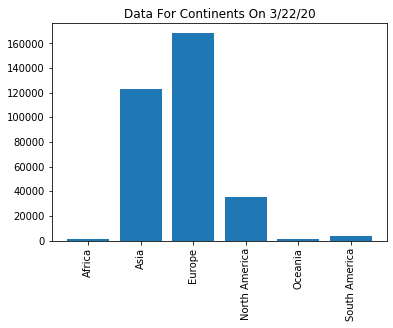

In [13]:
plt.clf()
plt.title('Data For Continents On 3/22/20')
plt.bar(conts,get_cases_for_continent('3/22/20'))
plt.xticks(rotation=90)